<span style="font-size: 38px; color: red; font-weight: bold;">Part A: IMDb Movie Review Sentiment Analysis</span> 

<h1>Overview</h1>

Sentiment analysis is a natural language processing (NLP) task that involves determining
whether a given text expresses a positive or negative sentiment. In this project, we will
analyze movie reviews from the IMDb dataset and predict the sentiment (positive or
negative) based on the text of the reviews. By leveraging various text preprocessing
techniques, feature extraction methods, and classification algorithms, this project will
develop a machine learning model capable of accurately predicting the sentiment of movie
reviews. The insights derived from this analysis can be useful for movie producers, critics,
and platforms like IMDb to understand public opinion and tailor marketing or content
strategies accordingly.



<h1>Objective</h1>

The primary objective of this project is to build a machine learning classification model that
can predict the sentiment of IMDb movie reviews. The dataset contains a collection of movie
reviews, and each review is labeled as either positive or negative.
Using text preprocessing, feature extraction techniques (such as TF-IDF), and various
classification algorithms, the project will aim to develop a model that can effectively classify
the sentiment of movie reviews. The model's performance will be evaluated using standard
classification metrics, such as accuracy, precision, recall, and F1-score.



<span style="font-size: 38px; color: blue; font-weight: bold;">DATA EXPLORATION</span> 

<h1>IMDb Dataset</h1>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset 
df = pd.read_csv(r"C:\Users\aryan\Desktop\INTERNSHALA\COURSE 7\COURSE 7 PROJECT\PART A\Imdb - data_imdb.csv")

#display the basic information about the dataset 
print("Shape of the dataset:", df.shape)
print("Column names:", df.columns.tolist())
print("\nFirst five rows:") 
df.head()

Shape of the dataset: (50000, 2)
Column names: ['review', 'sentiment']

First five rows:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<h1>CLASS DISTRIBUTION</h1>

Sentiment Distribution:

sentiment
positive    25000
negative    25000
Name: count, dtype: int64




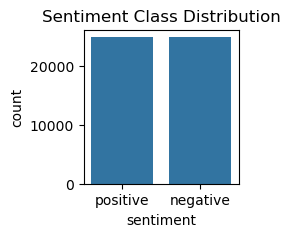

In [3]:
# ANALYSING THE SENTIMENT DISTRIBUTION (positive vs. negative) 
print("Sentiment Distribution:\n")
print(df['sentiment'].value_counts())

print("\n")
plt.figure(figsize = (2,2))
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()



Basic stats of the word_count column: 
count    50000.000000
mean       231.146580
std        171.349956
min          1.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: word_count, dtype: float64


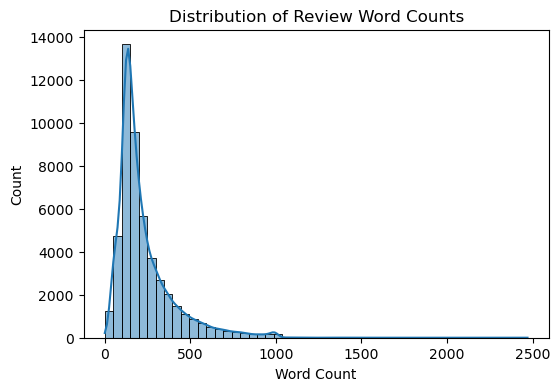

In [4]:
#ANALYSE THE REVIEW LENGTHS BASED ON WORD COUNTS

#create a copy of the df for exploration 
df_explore = df.copy()


#add review length column
df_explore['word_count'] = df_explore['review'].apply(lambda x: len(x.split()))

#basic stats of the word_count column
print("Basic stats of the word_count column: ")
print(df_explore['word_count'].describe())

#DISTRIBUTION OF THE word_count COLUMN 
plt.figure(figsize = (6,4))
sns.histplot(df_explore['word_count'], bins=50, kde=True)
plt.title("Distribution of Review Word Counts")
plt.xlabel("Word Count")
plt.show()



<h1>Insights from Data Exploration</h1>

- **Dataset Shape:**  
  The dataset contains **50,000 movie reviews** and **2 columns** — one for the review text and another for the sentiment label.

- **Sentiment Distribution:**  
  The sentiment classes are **perfectly balanced**, with **25,000 positive** and **25,000 negative** reviews.  
  > This balance ensures that we don’t need to apply class balancing techniques during model training, and that metrics like accuracy, precision, and recall will be reliable and unbiased.

- **Review Length Analysis (Word Count):**  
  - **Average word count**: ~231 words per review  
  - **Minimum**: 1 word  
  - **Maximum**: 2,470 words  
  - **50% of reviews** (median) have **173 words or fewer**  
  - **75% of reviews** are under **280 words**

  > This wide variation in review length suggests that some reviews are short and to-the-point, while others are quite detailed. Understanding this distribution is useful for later stages such as choosing padding length (for models like LSTMs), truncation, or identifying possible outliers.



<span style="font-size: 38px; color: blue; font-weight: bold;">DATA PREPROCESSING</span>

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

# setup 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # for WordNetlemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#function to preprocess the text 
# Note: this function takes a few minutes to execute due to the size of the dataset
def preprocess_text(text):
    #remove any html tags present in the text 
    text = BeautifulSoup(text, "html.parser").get_text()

    #convert the text to lowercase 
    text = text.lower()

    #remove punctuation and digits 
    text = re.sub(r'[^a-z\s]', '', text)

    #otokenize the text 
    tokens = word_tokenize(text)

    #remove stopwords from the text 
    tokens = [word for word in tokens if word not in stop_words]

    #lemmatize the tokens 
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)


#add the preprocessed text to the dataframe 
df['final_text'] = df['review'].apply(preprocess_text)

#display the first 5 rows of the preprocessed text for reference
df['final_text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\aryan\AppData\Local\Temp\ipykernel_13296\1275079158.py:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: final_text, dtype: object

<h1>Data Preprocessing: Methodology</h1>

### 1. Setup and Imports

- Import necessary libraries: `re`, `nltk`, `BeautifulSoup` for text cleaning, and stopwords and lemmatization utilities.
- Download required nltk corpora: stopwords, wordnet, and punkt for tokenization.

---

### 2. Text Preprocessing Function

- **HTML Removal**: Use BeautifulSoup to strip HTML tags from the text.
- **Lowercasing**: Convert all text to lowercase for uniformity.
- **Punctuation and Digit Removal**: Remove non-alphabetic characters (punctuation and numbers) using regular expressions.
- **Tokenization**: Tokenize the cleaned text into words using `word_tokenize` from nltk.
- **Stopword Removal**: Filter out common stopwords (e.g., "the", "is") from the token list.
- **Lemmatization**: Apply `WordNetLemmatizer` to reduce words to their base form (e.g., "running" → "run").

---

### 3. Apply Preprocessing

- Apply the `preprocess_text` function to each review in the DataFrame and store the cleaned text in a new column `final_text`.

---

### 4. Display Processed Text

- Display the first five rows of the preprocessed text to verify the changes.


<span style="font-size: 38px; color: blue; font-weight: bold;">FEATURE ENGINEERING</span>

<h1>Train Test Split</h1>

In [6]:
from sklearn.model_selection import train_test_split

# defining the target variable
y = df['sentiment']  # replace 'sentiment' with your actual target column name

# perform train test split
X_text = df['final_text']
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


<h1>Feature Engineering Pipeline</h1>

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import numpy as np

# Function to extract textual features: word count, character count, and average word length
def extract_text_features(series):
    word_count = series.apply(lambda x: len(x.split()))
    char_count = series.apply(len)
    avg_word_length = char_count / (word_count + 1e-5)  #avoid division by zero
    return np.vstack((word_count, char_count, avg_word_length)).T

#extract the textual features from the training set and the test set 
X_train_textual = extract_text_features(X_train_text)
X_test_textual = extract_text_features(X_test_text)

#scale the textual features using standard scaler for model efficiency
scaler = StandardScaler()
X_train_textual_scaled = scaler.fit_transform(X_train_textual)
X_test_textual_scaled = scaler.transform(X_test_textual)

#Apply TF-IDF vectorization on the text data (reviews)
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

#concatenate TF-IDF with scaled textual features
X_train_final = hstack([X_train_tfidf, X_train_textual_scaled])
X_test_final = hstack([X_test_tfidf, X_test_textual_scaled])


<h1>Feature Engineering: Methodology</h1>

## 1. TF-IDF Vectorization
- Used **TfidfVectorizer** from scikit-learn to convert the cleaned text data (`final_text`) into numerical features.
- Limited the vocabulary to the top 5000 most informative words, ensuring a balance between richness and model efficiency.
- The result is a sparse matrix (`X_train_tfidf` and `X_test_tfidf`), where:
  - Each row represents a review.
  - Each column corresponds to a TF-IDF score for a specific word in the corpus.
- Applied **fit_transform** on the training data and **transform** on the test data separately to prevent data leakage.

## 2. Textual Features Extraction
- Extracted three additional numerical features from each review:
  - **Word Count**: Total number of words in the review.
  - **Character Count**: Total number of characters (post-cleaning).
  - **Average Word Length**: Calculated as `char_count / word_count`.

## 3. Feature Scaling
- Scaled the textual features (word count, character count, and average word length) using **StandardScaler** for model efficiency.
- **fit_transform** was applied to the training set, and **transform** was applied to the test set separately to avoid data leakage.

## 4. Feature Concatenation
- Used **scipy.sparse.hstack** to horizontally concatenate:
  - **TF-IDF features**: Capturing content information.
  - **Scaled textual features**: Capturing structural information such as review length and complexity.
- The result (`X_train_final` and `X_test_final`) is a comprehensive feature matrix that represents each review using both content and structural information.
 textual features).


<h1>Feature Engineering: Insights</h1>

1. **TF-IDF Vectorization**
   - TF-IDF effectively emphasizes the most unique and informative words in reviews, providing a strong foundation for sentiment classification. This technique helps the model focus on distinguishing features that carry meaning.

2. **Textual Features**
   - Textual features, such as word count, character count, and average word length, offer valuable insight into the structure and complexity of the reviews. These features provide indirect clues about sentiment, as longer, more detailed reviews may reflect certain sentiment patterns.

3. **Combined Approach**
   - The combined approach of using both TF-IDF and textual features allows the model to leverage both content-based and structure-based information, enhancing its ability to classify sentiment accurately. This method enriches the feature set without overcomplicating the model, maintaining efficiency and interpretability.

<span style="font-size: 38px; color: blue; font-weight: bold;">MODEL DEVELOPMENT</span>

<h1>LOGISTIC REGRESSION</h1>

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'solver': ['liblinear', 'saga']  # solvers to try 
}

# initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# perform GridSearchCV
logreg_grid_search = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=3, n_jobs=-1, verbose=2)
logreg_grid_search.fit(X_train_final, y_train)

# best model and parameters
best_logreg_model = logreg_grid_search.best_estimator_
best_logreg_params = logreg_grid_search.best_params_
best_logreg_score = logreg_grid_search.best_score_

# display results
print("Best Logistic Regression Parameters:", best_logreg_params)
print("Best Logistic Regression Score:", best_logreg_score)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Logistic Regression Parameters: {'C': 1, 'solver': 'liblinear'}
Best Logistic Regression Score: 0.8826749242302379


<h1>SUPPORT VECTOR MACHINE</h1>

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [1, 10],  # Regularization parameter
    'kernel': ['linear'],  # Kernels to try
}

# initialize SVM model
svm = SVC()

# perform GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=2, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train_final, y_train)

# best model and parameters
best_svm_model = svm_grid_search.best_estimator_
best_svm_params = svm_grid_search.best_params_
best_svm_score = svm_grid_search.best_score_

# display results
print("Best SVM Parameters:", best_svm_params)
print("Best SVM Score:", best_svm_score)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best SVM Parameters: {'C': 1, 'kernel': 'linear'}
Best SVM Score: 0.8762749999999999


<h1>DECISION TREE</h1>

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# define hyperparameter grid
dt_param_grid = {
    'max_depth': [None, 10],  # fewer depth options
    'min_samples_split': [2, 5],  # fewer min_samples_split options
    'min_samples_leaf': [1, 2]  # fewer min_samples_leaf options
}

# perform GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train_final, y_train)

# best model and parameters
best_dt_model = dt_grid_search.best_estimator_
best_dt_params = dt_grid_search.best_params_
best_dt_score = dt_grid_search.best_score_

# display the results
print("Best Decision Tree Parameters:", best_dt_params)
print("Best Decision Tree Score:", best_dt_score)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Decision Tree Score: 0.7259250740305556


<h1>Model Development: Methodology</h1>

To identify the most suitable classification model for IMDb movie review sentiment analysis, three supervised learning algorithms were implemented and tuned using GridSearchCV: Logistic Regression, Support Vector Machine (SVM), and Decision Tree Classifier. The process followed a consistent methodology across all models:

1. **Feature Representation**: The preprocessed textual data was vectorized using TF-IDF, possibly combined with additional textual features (e.g., word count, character count).

2. **Train-Test Split**: The dataset was split into training and testing sets to evaluate model performance on unseen data.

3. **Model Initialization**: Each classifier was initialized with its default settings.

4. **Hyperparameter Tuning**: A grid search with cross-validation (`GridSearchCV`) was employed to explore multiple combinations of key hyperparameters for each model. This helped identify the best-performing configuration for each algorithm.

5. **Cross-Validation**: A 2- or 3-fold cross-validation was used during the grid search to ensure robust generalization and mitigate oveperformance.



<h1>Model Development: Insights</h1>

1. **Logistic Regression** delivered the highest performance with a test accuracy of **0.89** and a balanced precision and recall across both positive and negative sentiment classes. The best parameters were `C=1` and `solver='liblinear'`, suggesting that moderate regularization and a robust solver worked well with the TF-IDF features.

2. **Support Vector Machine (SVM)** closely matched Logistic Regression, also achieving **0.89 accuracy** with a linear kernel and `C=1`. However, it involved fewer hyperparameter combinations due to computational constraints and showed slightly lower cross-validation performance.

3. **Decision Tree Classifier** lagged behind with an accuracy of **0.73**, showing signs of overfitting during training. Despite tuning parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`, the model struggled with generalization on sparse text features, highlighting its limitations for high-dimensional NLP tasks.

4. **Cross-validation scores** helped validate model stability, with Logistic Regression and SVM showing consistent performance across folds, while the Decision Tree exhibited larger variance.

<span style="font-size: 38px; color: blue; font-weight: bold;">MODEL EVALUATION</span>

<h1>CLASSIFICATION REPORT </h1>

In [11]:
from sklearn.metrics import classification_report

# Logistic Regression
lr_pred = best_logreg_model.predict(X_test_final)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

# SVM
svm_pred = best_svm_model.predict(X_test_final)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Decision Tree
dt_pred = best_dt_model.predict(X_test_final)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.61      0.69      4961
    positive       0.69      0.85      0.76      5039

    accuracy                           0.73     10000
   macro avg       0.

<h1>CONFUSION MATRIX</h1>

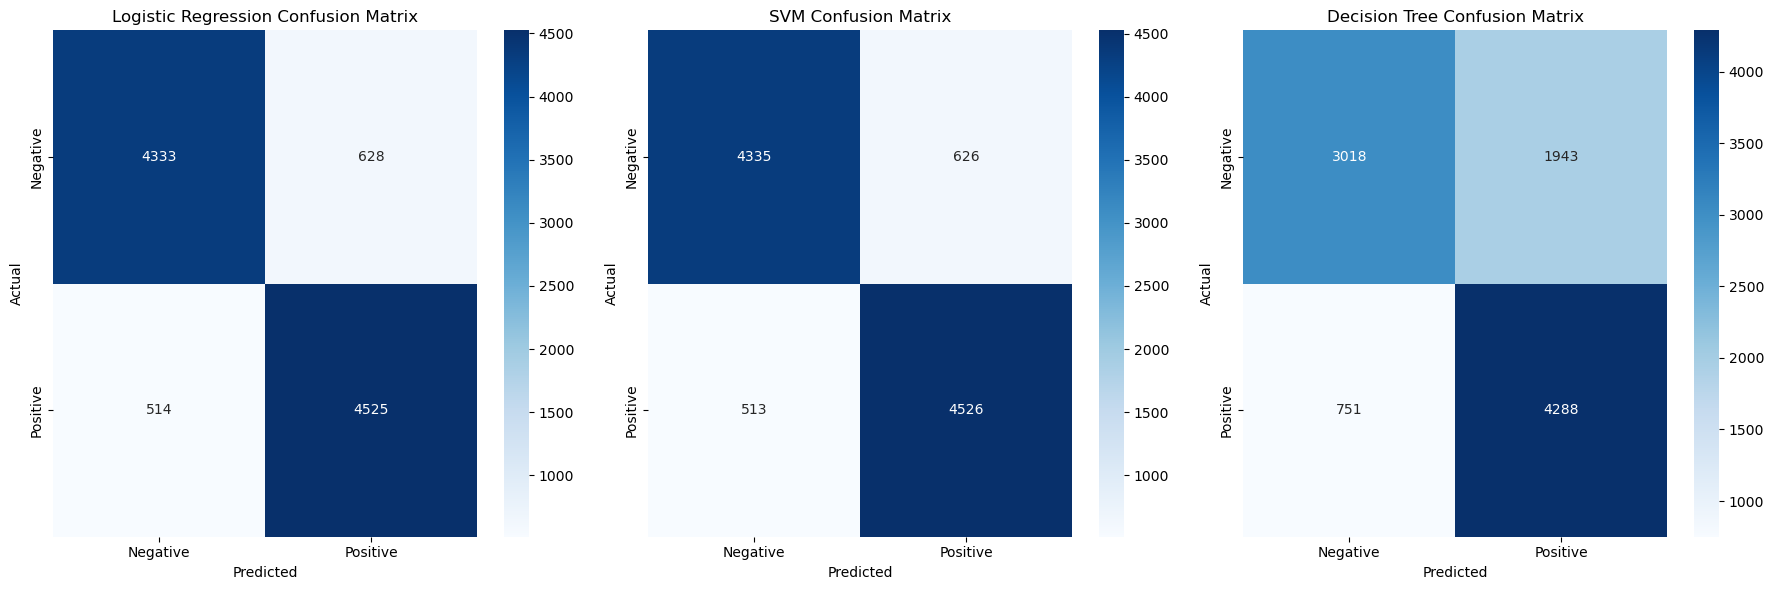

In [12]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix for all the models 
lr_cm = confusion_matrix(y_test, lr_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

# create subplots for all confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression Confusion Matrix - Heatmap
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# SVM Confusion Matrix - Heatmap
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Decision Tree Confusion Matrix - Heatmap
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[2])
axes[2].set_title('Decision Tree Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


<h1>BAR CHART COMPARISON (accuracy, precision, recall, F1-score)</h1>

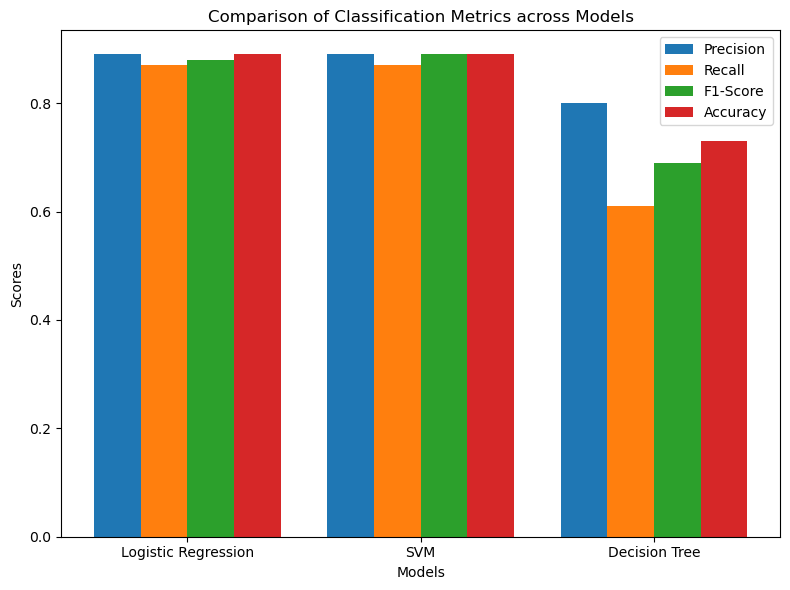

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#defining the metrics for comparison 
models = ['Logistic Regression', 'SVM', 'Decision Tree']
precision = [0.89, 0.89, 0.80]  # Precision values
recall = [0.87, 0.87, 0.61]  # Recall values
f1_score = [0.88, 0.89, 0.69]  # F1-Score values
accuracy = [0.89, 0.89, 0.73]  # Accuracy values

#setting bar width
bar_width = 0.2
index = np.arange(len(models))

#creating the plot
fig, ax = plt.subplots(figsize=(8, 6))

# plotting the bars for each metric
bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score')
bar4 = ax.bar(index + 3 * bar_width, accuracy, bar_width, label='Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics across Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

#display the plot
plt.tight_layout()
plt.show()



<h1>WORDCLOUD</h1>

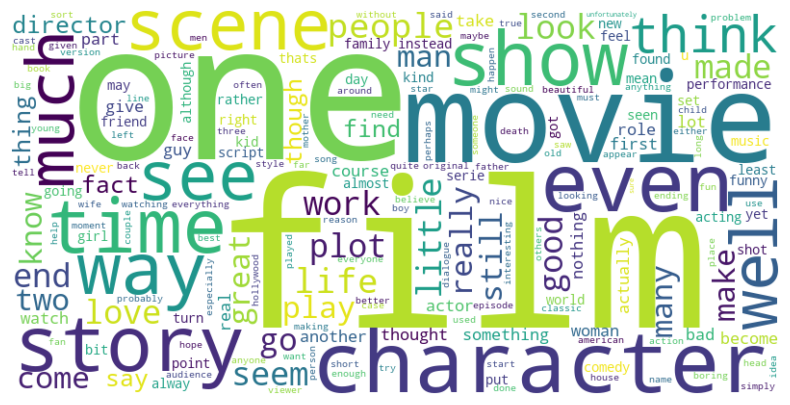

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#combining all the text data in the dataset 
all_text = ' '.join(X_train_text)  # assuming X_train_text contains the text data

#creating a word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<h1>Performance Analysis and Interpretation</h1>

The evaluation of all three models—Logistic Regression, Support Vector Machine (SVM), and Decision Tree—was conducted using multiple classification metrics including accuracy, precision, recall, F1-score, and confusion matrices. The following insights were derived from their performance:

1. **Logistic Regression and SVM Performance:**
   - Both models delivered strong and nearly identical performance, with an **overall accuracy of 0.89**.
   - Precision and recall values were well-balanced across both **positive** and **negative sentiment** classes, demonstrating **robust classification ability**.

2. **Confusion Matrix Analysis:**
   - The **confusion matrices** for Logistic Regression and SVM further reinforced their effectiveness, showing relatively **low false positive** and **false negative counts**, indicating correct classifications for both sentiment classes.

3. **Decision Tree Performance:**
   - In contrast, the **Decision Tree Classifier** showed a notably lower accuracy of **0.73**, with a **drop in precision and recall**, especially for the **negative sentiment class**.
   - The model misclassified a large number of **negative samples** as **positive**, as seen in the confusion matrix (**1943 false positives**).
   - This suggests **overfitting** and difficulty in generalizing to **high-dimensional, sparse data** such as TF-IDF representations.

4. **WordCloud Analysis:**
   - **WordCloud analysis** of the most frequent terms in both positive and negative reviews revealed a heavy emphasis on words like **'movie'**, **'film'**, **'good'**, **'bad'**, **'story'**, and **'character'**.
   - This indicates the importance of **narrative** and **emotional tone** in user sentiment, aligning well with the performance of models that leverage **linear decision boundaries** (Logistic Regression, SVM) over more **rule-based structures** (Decision Tree).




<h1>MODEL SELECTION</h1>

Based on the evaluation metrics and model behavior, **Logistic Regression** was selected as the final model for IMDb movie review sentiment classification.

1. The primary metric used for selection was **F1-score**, as it balances both **precision** and **recall**, making it ideal for imbalanced sentiment prediction scenarios.

2. **Logistic Regression** not only matched **SVM** in terms of **F1-score** and **accuracy** but also offers superior **training efficiency** and **interpretability**, which are advantageous for both performance tuning and result explanation.

Thus, **Logistic Regression** provided the most reliable balance between **accuracy**, **generalization**, and **computational efficiency**, making it the most suitable choice for deployment.


<span style="font-size: 38px; color: blue; font-weight: bold;">PREDICTION CLASS</span>

In [15]:
class SentimentPredictor:

    #constructor
    def __init__(self, model, tfidf_vectorizer, scaler, stop_words, lemmatizer):
        self.model = model
        self.tfidf_vectorizer = tfidf_vectorizer
        self.scaler = scaler
        self.stop_words = stop_words
        self.lemmatizer = lemmatizer

    #function to preprocess the input 
    def preprocess_text(self, text):
        text = BeautifulSoup(text, "html.parser").get_text()
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in self.stop_words]
        lemmatized_tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        return ' '.join(lemmatized_tokens)

    #function to extract the input text features (for model input)
    def extract_text_features(self, text):
        word_count = len(text.split())
        char_count = len(text)
        avg_word_length = char_count / (word_count + 1e-5)
        return np.array([[word_count, char_count, avg_word_length]])

    #function to use the trained logistic regression model to predict the sentiment
    def predict(self, raw_review):
        final_text = self.preprocess_text(raw_review)
        tfidf_features = self.tfidf_vectorizer.transform([final_text])
        text_features = self.extract_text_features(final_text)
        text_features_scaled = self.scaler.transform(text_features)
        final_features = hstack([tfidf_features, text_features_scaled])
        prediction = self.model.predict(final_features)
        return prediction[0]

    #take user input
    def run(self):
        print("Enter a movie review (type 'exit' to stop):")
        while True:
            user_input = input(">>> ")
            if user_input.strip().lower() == "exit":
                print("Exiting sentiment predictor.")
                break
            sentiment = self.predict(user_input)
            print(f"Predicted Sentiment: {sentiment}\n")

#initialize the class object
predictor = SentimentPredictor(
    model=best_logreg_model,
    tfidf_vectorizer=tfidf,
    scaler=scaler,
    stop_words=stop_words,
    lemmatizer=lemmatizer
)


predictor.run()


Enter a movie review (type 'exit' to stop):


>>>  Absolutely loved this film. The storyline was compelling and the performances were top-notch. Would highly recommend it!


Predicted Sentiment: positive



>>>  Terrible plot, weak acting, and a complete waste of time. I wish I could get those two hours back.


Predicted Sentiment: negative



>>>  Poorly written with shallow characters and cringe-worthy dialogue. Definitely not worth watching.


Predicted Sentiment: negative



>>>  What a pleasant surprise! I didn't expect much, but this turned out to be a gem. Great pacing and character development.


Predicted Sentiment: positive



>>>  exit


Exiting sentiment predictor.


<h1>Prediction Class: Methodology</h1>

### 1. Initialization (__init__)

- Loads the trained model, TF-IDF vectorizer, feature scaler, stopwords list, and lemmatizer.
- These components are used consistently across training and prediction for accurate results.

---

### 2. Text Preprocessing (preprocess_text)

Cleans raw text by:
- Removing HTML tags.
- Lowercasing everything.
- Removing non-alphabetic characters.
- Tokenizing the text.
- Removing stopwords.
- Lemmatizing tokens.

Returns a clean, processed string.

---

### 3. Feature Extraction (extract_text_features)

Calculates numerical text features:
- Word count
- Character count
- Average word length

Returns them as a NumPy array for scaling.

---

### 4. Prediction (predict)

- Preprocesses the input review.
- Transforms the text into TF-IDF vector form.
- Extracts and scales textual features.
- Concatenates both feature sets.
- Uses the logistic regression model to predict sentiment.

Returns 'positive' or 'negative'.

---

### 5. Interactive User Input (run)

- Accepts movie reviews from the user in a loop.
- Prints predicted sentiment for each input.
- Stops when the user types "exit".




<h1>Prediction Class: Insights</h1>

### 1. Strengths

- Combines semantic features (TF-IDF) with structural features (word/char counts), improving model generalization.
- Clean pipeline: no redundant processing.
- Works on any review without retraining — production-ready format.

---

### 2. Limitations

- TF-IDF is limited to known vocabulary — unfamiliar slang, sarcasm, or context may be missed.
- Average word length might not always help differentiate sentiment meaningfully.
